# 项目：探索TMDB电影数据集调查数据集

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>

## 简介

> The Movie Database (TMDb) is a community built movie and TV database. Every piece of data has been added by our amazing community dating back to 2008. TMDb's strong international focus and breadth of data is largely unmatched and something we're incredibly proud of. Put simply, we live and breathe community and that's precisely what makes us different.

## 优势

> 1. Every year since 2008, the number of contributions to our database has increased. With over 200,000 developers and companies using our platform, TMDb has become a premiere source for metadata.
> 2. Along with extensive metadata for movies, TV shows and people, we also offer one of the best selections of high resolution posters and fanart. On average, over 1,000 images are added every single day.
> 3. We're international. While we officially support 39 languages we also have extensive regional data. Every single day TMDb is used in over 180 countries.
> 4. Our community is second to none. Between our staff and community moderators, we're always here to help. We're passionate about making sure your experience on TMDb is nothing short of amazing.
> 5. Trusted platform. Every single day our service is used by millions of people while we process over 3 billion requests. We've proven for years that this is a service that can be trusted and relied on.

## 提出的问题:
> 1. 那些类型的电影的平均评分较高？
> 2. 那些电影公司出品的电影最多？
> 3. 评分与那些特征具有相关性?

<a id='wrangling'></a>
## 数据整理

### 导入package并加载数据集

In [1]:
#导入语句。
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns",0)

In [2]:
# 加载数据集
def load_data():
    df = pd.read_csv("tmdb-movies.csv")
    return df
if __name__ == '__main__':
    df = load_data()
df.head()

id    imdb_id  popularity     budget      ...       vote_average release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  150000000      ...                6.5         2015  1.379999e+08  1.392446e+09
1   76341  tt1392190   28.419936  150000000      ...                7.1         2015  1.379999e+08  3.481613e+08
2  262500  tt2908446   13.112507  110000000      ...                6.3         2015  1.012000e+08  2.716190e+08
3  140607  tt2488496   11.173104  200000000      ...                7.5         2015  1.839999e+08  1.902723e+09
4  168259  tt2820852    9.335014  190000000      ...                7.3         2015  1.747999e+08  1.385749e+09

[5 rows x 21 columns]

>相关属性的介绍。暂时没有找到官方解释，手动翻译以下。
1. id 编号 
2. imdb_id IMDB编号 
3. popularity 在 Movie Database 上的相对页面查看次数
4. budget 预算，单位是美元
5. revenue 收入，单位是美元
6. original_title 电影名称
7. cast 主要演员，使用"|"进行分隔
8. homepage 电影网站
9. director 导演，使用"|"进行分隔
10. tagline 宣传口号
11. keywords 关键字
12. overview 简介
13. runtime 电影时长，单位是min
14. genres 电影类型，使用"|"进行分隔
15. production_companies 出品公司，使用"|"进行分隔
16. release_date 发行日期
17. vote_count 投票的数量
18. vote_average 投票的平均分
19. release_year 发行年份
20. budget_adj 调整后预算，调整inflation。数量级是10^8(亿元)，货币单位是美元
21. revenue_adj 调整后收入，调整inflation。数量是10^8(亿元)，货币单位是美元

>参考网站：https://zhuanlan.zhihu.com/p/48415482

### 常规属性

In [3]:
#查看数据集的记录数量和特征数量
df.shape

(10866, 21)

In [4]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [5]:
#查看数据集中各个属性的数据类型，判断数据类型与属性是否一直，并且查看各个属性否存在空值的情况。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

+ 需要将"release_year"的类型转换为datetime类型。
+ 需要将"runtime"的类型转换为float类型

In [6]:
# 查看是否存在空值
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

+ 首先应该找到所有的属性都是null的记录，直接去除。
+ 电影是否有主页，与电影的评分等情况关系较小，没有主页的记录占总记录的比例超过50%，因此不能简单的进行去除空值记录。
+ 分析出品公司与电影的关系，因此需要处理production_companies字段缺失的记录。
+ 分析电影类型与电影评分的关系，因此需要处理genres缺失的记录。

In [7]:
# 查看是否存在重复的记录
df.duplicated().sum()

1

In [8]:
# 查看数值类型的字段的描述统计特征，判断是否存在异常值，
df.describe()

id    popularity        budget      ...       release_year    budget_adj   revenue_adj
count   10866.000000  10866.000000  1.086600e+04      ...       10866.000000  1.086600e+04  1.086600e+04
mean    66064.177434      0.646441  1.462570e+07      ...        2001.322658  1.755104e+07  5.136436e+07
std     92130.136561      1.000185  3.091321e+07      ...          12.812941  3.430616e+07  1.446325e+08
min         5.000000      0.000065  0.000000e+00      ...        1960.000000  0.000000e+00  0.000000e+00
25%     10596.250000      0.207583  0.000000e+00      ...        1995.000000  0.000000e+00  0.000000e+00
50%     20669.000000      0.383856  0.000000e+00      ...        2006.000000  0.000000e+00  0.000000e+00
75%     75610.000000      0.713817  1.500000e+07      ...        2011.000000  2.085325e+07  3.369710e+07
max    417859.000000     32.985763  4.250000e+08      ...        2015.000000  4.250000e+08  2.827124e+09

[8 rows x 10 columns]

需要处理异常值的列，包括‘runtime’,'budget_adj','revenue_adj'
> + 'runtime'表示电影的时长，因此最小值如果是0，显然不合理。
> + 'budget_adj’和‘revenue_adj’表示金额，因此如果最小值是0，显然不合理

### 数据清理
+ 在讨论数据结构和需要解决的任何问题之后，在本部分的第二小部分进行这些清理步骤。


#### 创建数据集副本
+ 保留原数据集，做好备份。

In [9]:
df_copy = df.copy()
df_copy.head(1)

id    imdb_id  popularity     budget      ...       vote_average release_year    budget_adj   revenue_adj
0  135397  tt0369610   32.985763  150000000      ...                6.5         2015  1.379999e+08  1.392446e+09

[1 rows x 21 columns]

####  处理不需要的列，以及列名

+ 根据需要选择无关字段或者属性，并删除处理。
+ 综上，其中“overview”,"keywords","tagline"属于无关字段。
+ 另外，“budget”,"revenue"字段与“budget_adj”,"revenue_adj"选择一组即可，优先选择后者，因为不受物价水平影响。
+ “release_date”与“release_year”应该选择一个即可，如果没有必要详细到发型的日期，那么选择后者即可。
+ "vote_count"字段，与电影评分或者电影本身关系不大，只与投票人数有关或者总票数有关。
+ "popularity"字段，暂时保留，不确定这个字段的意义。

> + 参考 https://blog.csdn.net/moyue1002/article/details/80332186
> + 其中提出了，id字段可以作为无用字段进行删除处理。

In [10]:
# 删除不需要的列或者属性
df_copy.drop(["overview","tagline","keywords","homepage","vote_count","release_date","revenue","budget","id"],axis =1 ,inplace = True)

In [11]:
# 验证删除的效果。
df_copy.columns

Index(['imdb_id', 'popularity', 'original_title', 'cast', 'director',
       'runtime', 'genres', 'production_companies', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

#### 处理重复值

In [12]:
df_copy.drop_duplicates(inplace = True)
# 查看去重的结果。
df_copy.duplicated().sum()

0

#### 处理空值

In [13]:
df_copy.dropna(axis = 0,subset=['imdb_id','cast','director','genres','production_companies'],inplace = True)
# 查看处理的结果。
df_copy.isnull().sum()

imdb_id                 0
popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### 转换合适的数据类型

In [14]:
df_copy['runtime']= df_copy['runtime'].astype(float)

In [15]:
df_copy.release_year= pd.to_datetime(df_copy.release_year,errors='raise',format="%Y")

In [16]:
# 查看转换的结果
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 12 columns):
imdb_id                 9770 non-null object
popularity              9770 non-null float64
original_title          9770 non-null object
cast                    9770 non-null object
director                9770 non-null object
runtime                 9770 non-null float64
genres                  9770 non-null object
production_companies    9770 non-null object
vote_average            9770 non-null float64
release_year            9770 non-null datetime64[ns]
budget_adj              9770 non-null float64
revenue_adj             9770 non-null float64
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 992.3+ KB


#### 处理异常值
* 处理值为0的数据，删除处理。

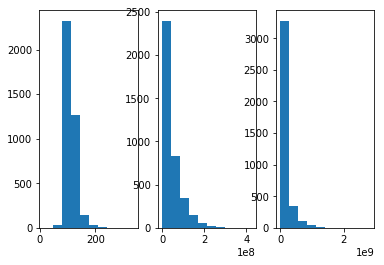

In [17]:
df_copy = df_copy[(df_copy.runtime>0)&(df_copy.budget_adj>0)&(df_copy.revenue_adj>0)]
plt.subplot(1,3,1)
plt.hist(df_copy['runtime'])
plt.subplot(1,3,2)
plt.hist(df_copy['budget_adj'])
plt.subplot(1,3,3)
plt.hist(df_copy['revenue_adj'])
plt.show()

#### 重置index

In [18]:
#因为删除了重复，以及处理了空值，因此index不连续，需要进行reset_index操作。
#同时，需要配合参数"drop"，默认为False，会掺入新的列。
df_copy.reset_index(drop = True,inplace=True)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3805 entries, 0 to 3804
Data columns (total 12 columns):
imdb_id                 3805 non-null object
popularity              3805 non-null float64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null float64
genres                  3805 non-null object
production_companies    3805 non-null object
vote_average            3805 non-null float64
release_year            3805 non-null datetime64[ns]
budget_adj              3805 non-null float64
revenue_adj             3805 non-null float64
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 356.8+ KB


<a id='eda'></a>
## 探索性数据分析



### 问题1：那些类型的电影的平均评分较高？

In [19]:
new_genres = pd.Series(df_copy.genres.str.split('|',expand=True).stack())
new_genres = new_genres.reset_index(level = 1,drop = True).rename('genres')
no_columns_cast_genres_prod_corp = df_copy.drop(['cast','genres','production_companies'],axis = 1)
df_with_new_genres = pd.concat([no_columns_cast_genres_prod_corp,new_genres],axis =1)
df_with_new_genres.head()

imdb_id  popularity      original_title       ...           budget_adj   revenue_adj           genres
0  tt0369610   32.985763      Jurassic World       ...         1.379999e+08  1.392446e+09           Action
0  tt0369610   32.985763      Jurassic World       ...         1.379999e+08  1.392446e+09        Adventure
0  tt0369610   32.985763      Jurassic World       ...         1.379999e+08  1.392446e+09  Science Fiction
0  tt0369610   32.985763      Jurassic World       ...         1.379999e+08  1.392446e+09         Thriller
1  tt1392190   28.419936  Mad Max: Fury Road       ...         1.379999e+08  3.481613e+08           Action

[5 rows x 10 columns]

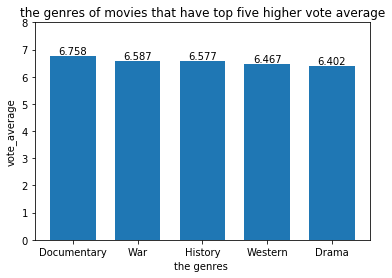

In [20]:
genres_vote_average = df_with_new_genres.groupby('genres').vote_average.mean().sort_values(ascending=False)
x = genres_vote_average.index[:5]
y = genres_vote_average.values[:5]
plt.bar(x,height =y,width = 0.7)
plt.title('the genres of movies that have top five higher vote average')
plt.xlabel('the genres ')
plt.ylabel('vote_average')
plt.ylim(0,8)
for a,b in zip(x,y):
    plt.text(a,b,'%.3f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()

#### 问题1的结论:
> + Documentary, War, History, Western和Drama的平均评分较高，比较受观众喜爱。
> + 其中Documentary类型的电影平均评分最高，高达6.758分。

### 问题2：那些电影公司出品的电影最多？

In [21]:
new_production_corp = df_copy.production_companies.str.split('|',expand = True).stack()
new_production_corp = new_production_corp.reset_index(level=1,drop = True).rename('production_companies')
no_columns_cast_genres_prod_corp = df_copy.drop(['cast','genres','production_companies'],axis = 1)

In [22]:
df_with_new_production_corp = pd.concat([no_columns_cast_genres_prod_corp,new_production_corp],axis=1)
df_with_new_production_corp.head()

imdb_id  popularity  original_title           ...               budget_adj   revenue_adj     production_companies
0  tt0369610   32.985763  Jurassic World           ...             1.379999e+08  1.392446e+09        Universal Studios
0  tt0369610   32.985763  Jurassic World           ...             1.379999e+08  1.392446e+09     Amblin Entertainment
0  tt0369610   32.985763  Jurassic World           ...             1.379999e+08  1.392446e+09       Legendary Pictures
0  tt0369610   32.985763  Jurassic World           ...             1.379999e+08  1.392446e+09  Fuji Television Network
0  tt0369610   32.985763  Jurassic World           ...             1.379999e+08  1.392446e+09                   Dentsu

[5 rows x 10 columns]

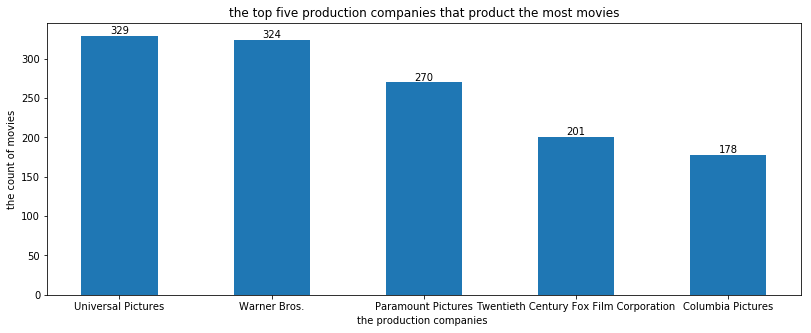

In [23]:
prod_corp_vote_average = df_with_new_production_corp.groupby('production_companies').vote_average.mean().sort_values(ascending= False)
prod_corp_counts = df_with_new_production_corp.groupby('production_companies').imdb_id.count().sort_values(ascending=False)
fg = plt.figure(figsize=(13.5,5.0))
x = prod_corp_counts.index[:5]
y = prod_corp_counts.values[:5]
plt.bar(x,height =y,width = 0.5)
plt.title('the top five production companies that product the most movies')
plt.xlabel('the production companies ')
plt.ylabel('the count of movies')
for a,b in zip(x,y):
    plt.text(a,b,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=10)
plt.show()

#### 问题2的结论：
> + Universal Pictures, Warner Bros, Paramount Pictures, 20th Century Fox,以及Columbia Pictures出产的电影较多。
> + 其中Universal Pictures电影公司出品的电影最多，高达329部电影。

### 问题3：电影评分与那些属性具有相关性？

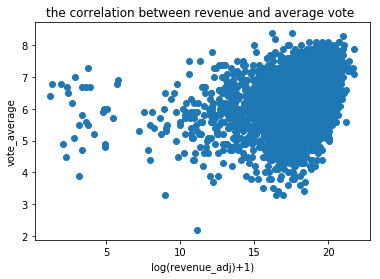

In [34]:
plt.scatter(np.log(df_copy.revenue_adj+1),df_copy.vote_average)
plt.xlabel('log(revenue_adj)+1)')
plt.ylabel('vote_average')
plt.title('the correlation between revenue and average vote ')
plt.show()

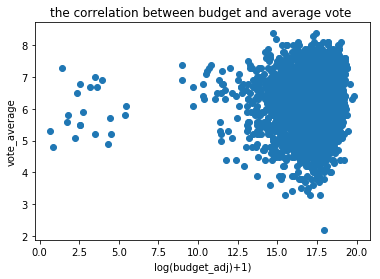

In [25]:
plt.scatter(np.log(df_copy.budget_adj+1),df_copy.vote_average)
plt.xlabel('log(budget_adj)+1)')
plt.ylabel('vote_average')
plt.title('the correlation between budget and average vote ')
plt.show()

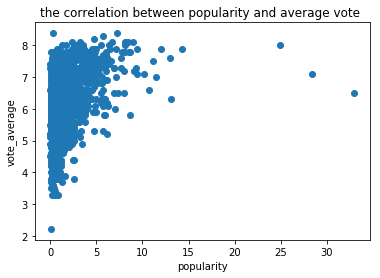

In [26]:
plt.scatter(df_copy.popularity,df_copy.vote_average)
plt.xlabel('popularity')
plt.ylabel('vote_average')
plt.title('the correlation between popularity and average vote ')
plt.show()

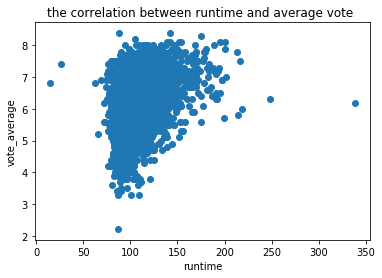

In [27]:
plt.scatter(df_copy.runtime,df_copy.vote_average)
plt.xlabel('runtime')
plt.ylabel('vote_average')
plt.title('the correlation between runtime and average vote ')
plt.show()

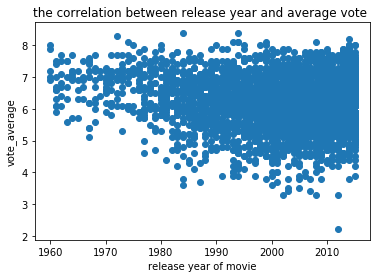

In [30]:
plt.scatter(df_copy.release_year.dt.year,df_copy.vote_average)
plt.xlabel('release year of movie')
plt.ylabel('vote_average')
plt.title('the correlation between release year and average vote ')
plt.show()

#### 问题3的结论：
> + 电影评分与电影的票房收入、投资、电影时长，放映年代，主页点击率没有强相关性。

<a id='conclusions'></a>
## 结论
> + Documentary, War, History, Western和Drama的平均评分较高，比较受观众喜爱。
> + 其中Documentary类型的电影平均评分最高，高达6.758分。
> + Universal Pictures, Warner Bros, Paramount Pictures, 20th Century Fox,以及Columbia Pictures出产的电影较多。
> + 其中Universal Pictures电影公司出品的电影最多，高达329部电影。
> + 电影评分与电影的票房收入、投资、电影时长，放映年代，主页点击率没有强相关性。

### 局限性
> + 评分还可能受年龄、学识等属性影响，因此根据现有的数据集说得出的上述结论是暂时性的。
> + 各个特征与电影的评分的关系，可能需要结合机器学习的知识来建立模型，从而需要进步一点的研究和探讨。

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295